In [5]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-50.30804452892361 170.38474884182455
36.284844939054835 55.2629661554262
-13.03559994252231 -38.086132958255746
14.352982567023759 -40.02758035789441
4.436031219995996 -120.54809886110986
-24.604532130127538 73.88165231448582
17.687634743094108 19.49087152215816
27.652908798927598 118.47532267198216
9.585395512498721 -50.38401827139319
85.00340563947307 7.171549702454087
43.986645713791006 -31.020892272105215
-50.8925628431987 -122.02572363791072
22.079347493090665 -11.73397800347098
-76.93043121001838 94.37019547237924
-21.19024031929567 -117.8441323683044
37.286313032109476 144.45071397734523
-59.12262856339355 -167.6463375399637
-12.265943512261941 -72.02426213660152
-76.12095532478716 37.62247278961644
-79.09681704440528 136.76981005115874
-82.27340623367354 105.16410256860905
-71.87008185253296 0.2472330087956891
-6.081366930342341 -23.822308518779238
28.226344758608818 -47.066502804541074
48.141138374200835 -140.94336018876746
-42.9208067756109 130.3804704153174
37.3994602252631

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

576

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ffd1aa092f0b3de335bb7f4951b2491"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ffd1aa092f0b3de335bb7f4951b2491


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

   # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | shahrud
Processing Record 3 of Set 1 | salvador
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | faya
Processing Record 8 of Set 1 | zhicheng
Processing Record 9 of Set 1 | sinnamary
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | atar
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | kamaishi
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | santa ana
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | georgetown
Processing Recor

Processing Record 39 of Set 4 | bluff
Processing Record 40 of Set 4 | nadym
Processing Record 41 of Set 4 | sokoni
Processing Record 42 of Set 4 | alta floresta
Processing Record 43 of Set 4 | dikson
Processing Record 44 of Set 4 | puerto ayora
Processing Record 45 of Set 4 | golden
Processing Record 46 of Set 4 | murmashi
Processing Record 47 of Set 4 | victoria
Processing Record 48 of Set 4 | sao sebastiao
Processing Record 49 of Set 4 | sofiysk
City not found. Skipping...
Processing Record 50 of Set 4 | babanusah
City not found. Skipping...
Processing Record 1 of Set 5 | rolim de moura
City not found. Skipping...
Processing Record 2 of Set 5 | the valley
Processing Record 3 of Set 5 | namatanai
Processing Record 4 of Set 5 | yumen
Processing Record 5 of Set 5 | bukachacha
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 5 | zyryanka
Processing Record 8 of Set 5 | flinders
Processing Record 9 of Set 5 | babu
Processing Record 10 of Set 5 | palmer
Processing Record

Processing Record 28 of Set 8 | pemba
Processing Record 29 of Set 8 | saint-pierre
Processing Record 30 of Set 8 | haines junction
Processing Record 31 of Set 8 | beira
Processing Record 32 of Set 8 | hajnowka
Processing Record 33 of Set 8 | tashtagol
Processing Record 34 of Set 8 | moree
Processing Record 35 of Set 8 | saint-augustin
Processing Record 36 of Set 8 | les cayes
Processing Record 37 of Set 8 | maria aurora
Processing Record 38 of Set 8 | la ronge
Processing Record 39 of Set 8 | kruisfontein
Processing Record 40 of Set 8 | santa marta
Processing Record 41 of Set 8 | parabel
Processing Record 42 of Set 8 | sembe
Processing Record 43 of Set 8 | rochegda
Processing Record 44 of Set 8 | show low
Processing Record 45 of Set 8 | lexington
Processing Record 46 of Set 8 | xining
Processing Record 47 of Set 8 | vila franca do campo
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Set 8 | san pedro
Processing Record 50 of Set 8 | sur
Processing Record 1 of Set 9 | bh

Processing Record 15 of Set 12 | asfi
Processing Record 16 of Set 12 | poltavka
Processing Record 17 of Set 12 | moose jaw
Processing Record 18 of Set 12 | sovetskiy
Processing Record 19 of Set 12 | corner brook
Processing Record 20 of Set 12 | okha
Processing Record 21 of Set 12 | tarauaca
Processing Record 22 of Set 12 | calama
Processing Record 23 of Set 12 | bismarck
Processing Record 24 of Set 12 | odweyne
Processing Record 25 of Set 12 | saint-joseph
Processing Record 26 of Set 12 | gat
-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,42.49,79,2,5.12,NZ,2022-11-09 10:53:21
1,Shahrud,36.4182,54.9763,52.41,22,0,2.15,IR,2022-11-09 10:53:21
2,Salvador,13.8333,-88.9167,62.76,97,93,3.42,SV,2022-11-09 10:50:41
3,Ponta Do Sol,32.6667,-17.1000,75.70,84,21,2.55,PT,2022-11-09 10:53:22
4,Cabo San Lucas,22.8909,-109.9124,73.51,70,0,5.01,MX,2022-11-09 10:53:22
5,Faya,18.3851,42.4509,77.11,36,1,10.31,SA,2022-11-09 10:53:23
6,Zhicheng,30.2956,111.5047,71.08,49,0,2.04,CN,2022-11-09 10:53:23
7,Sinnamary,5.3833,-52.9500,77.16,90,100,9.89,GF,2022-11-09 10:53:23
8,Lagoa,39.0500,-27.9833,64.44,72,86,14.74,PT,2022-11-09 10:53:24
9,Rikitea,-23.1203,-134.9692,74.05,90,100,9.35,PF,2022-11-09 10:53:24


In [16]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2022-11-09 10:53:21,-46.2817,169.8464,42.49,79,2,5.12
1,Shahrud,IR,2022-11-09 10:53:21,36.4182,54.9763,52.41,22,0,2.15
2,Salvador,SV,2022-11-09 10:50:41,13.8333,-88.9167,62.76,97,93,3.42
3,Ponta Do Sol,PT,2022-11-09 10:53:22,32.6667,-17.1000,75.70,84,21,2.55
4,Cabo San Lucas,MX,2022-11-09 10:53:22,22.8909,-109.9124,73.51,70,0,5.01
...,...,...,...,...,...,...,...,...,...
525,Calama,CL,2022-11-09 11:07:07,-22.4667,-68.9333,50.49,20,0,16.11
526,Bismarck,US,2022-11-09 11:05:02,46.8083,-100.7837,24.87,89,100,10.36
527,Odweyne,SO,2022-11-09 11:07:07,9.4092,45.0640,84.67,33,18,5.17
528,Saint-Joseph,RE,2022-11-09 11:07:08,-21.3667,55.6167,79.18,74,68,10.33


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

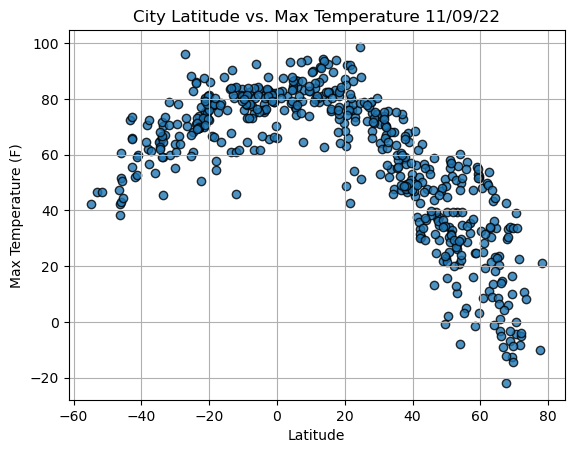

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

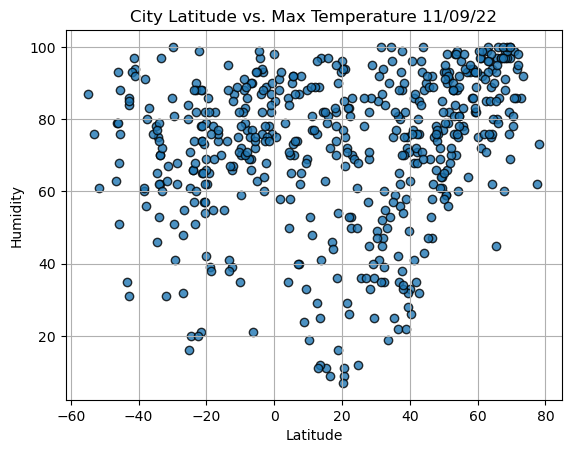

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

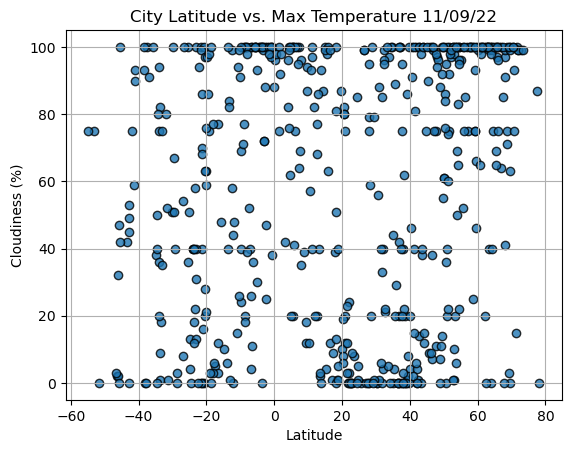

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

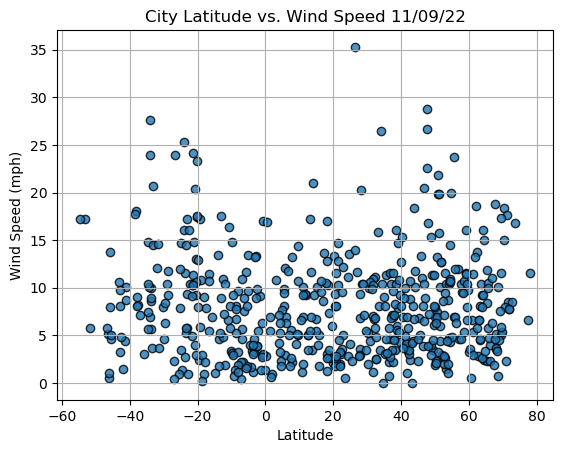

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2022-11-09 10:53:26
Lat                         -21.2
Lng                        -175.2
Max Temp                    75.36
Humidity                       88
Cloudiness                     40
Wind Speed                  10.36
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
525    False
526     True
527     True
528    False
529     True
Name: Lat, Length: 530, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Shahrud,IR,2022-11-09 10:53:21,36.4182,54.9763,52.41,22,0,2.15
2,Salvador,SV,2022-11-09 10:50:41,13.8333,-88.9167,62.76,97,93,3.42
3,Ponta Do Sol,PT,2022-11-09 10:53:22,32.6667,-17.1000,75.70,84,21,2.55
4,Cabo San Lucas,MX,2022-11-09 10:53:22,22.8909,-109.9124,73.51,70,0,5.01
5,Faya,SA,2022-11-09 10:53:23,18.3851,42.4509,77.11,36,1,10.31


In [28]:
# Create Northern and Southern Hemisphere DF
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

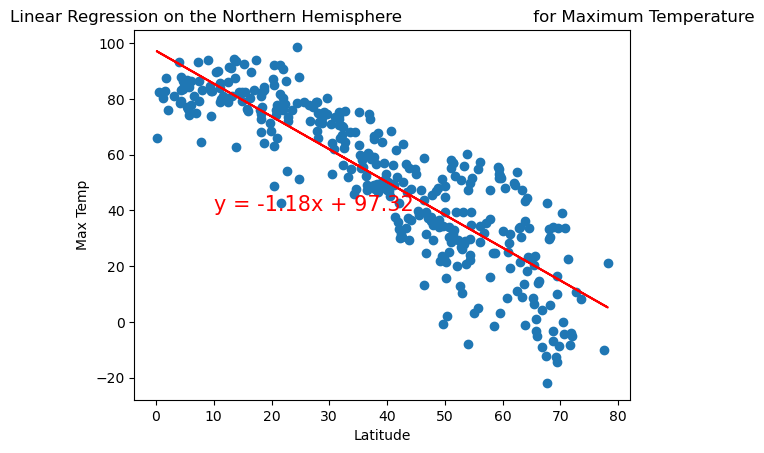

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

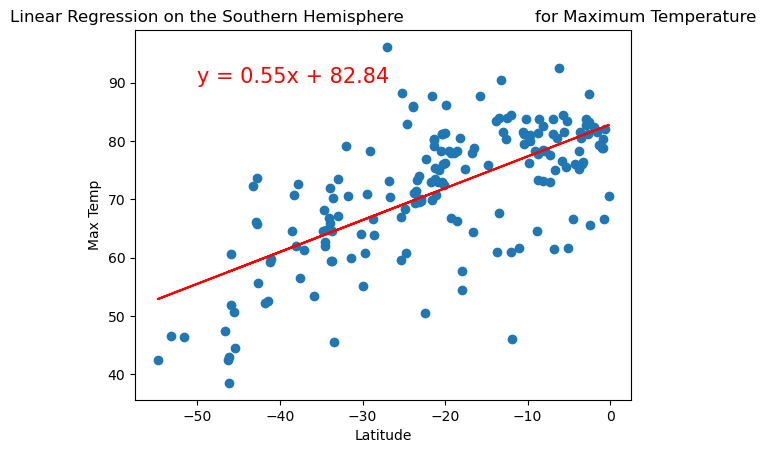

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

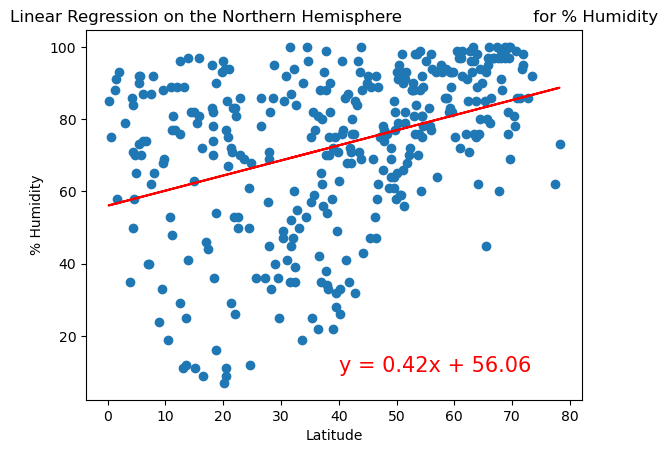

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

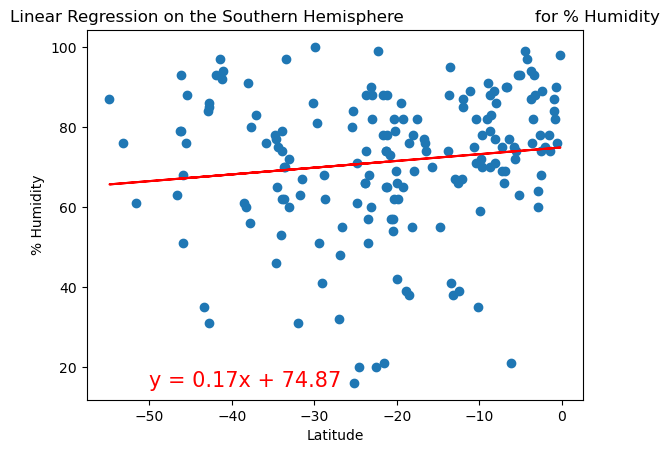

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

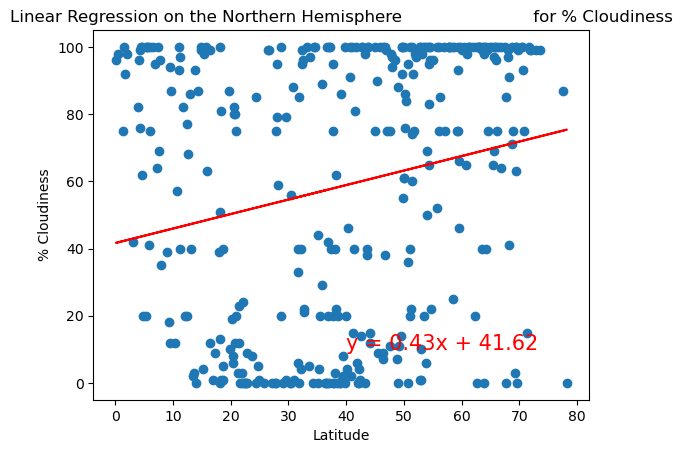

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

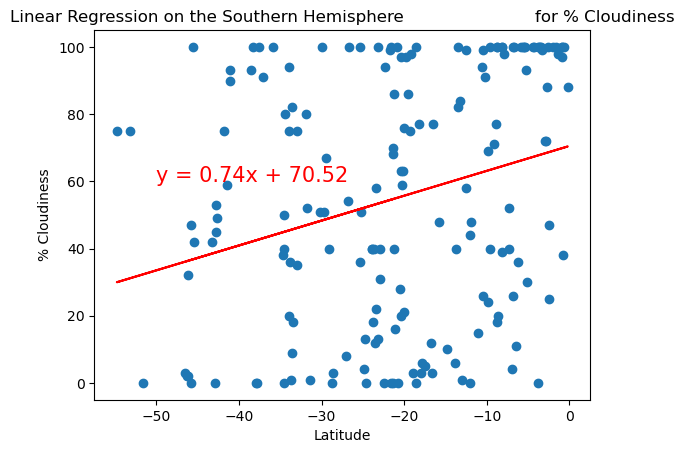

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

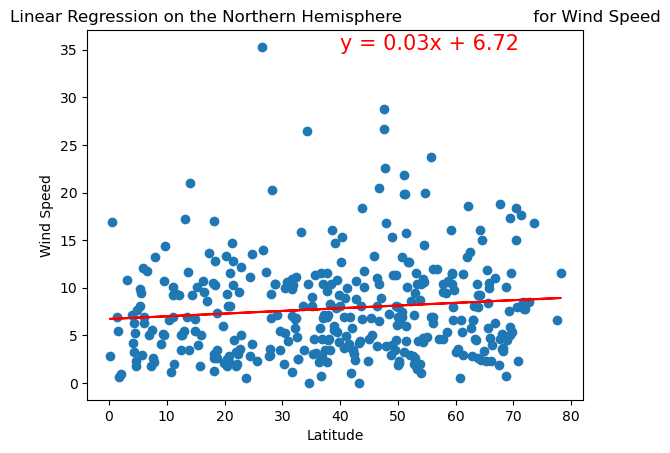

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

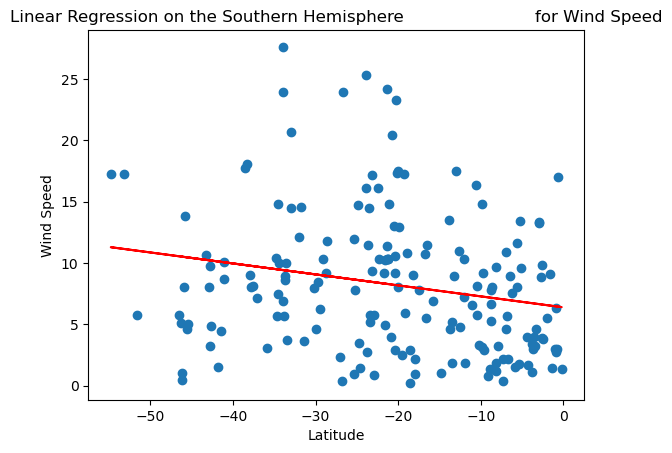

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))